## 0. Entendiendo

* Histogramas: Valores que aparecen en el conjunto de datos y el nro de veces que se repiten
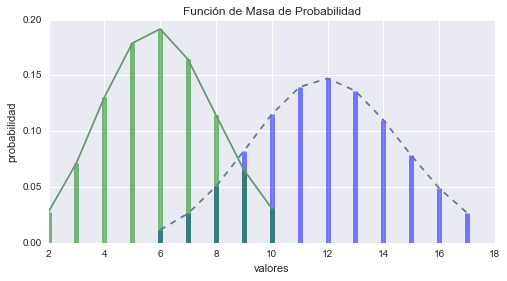
* Funcion masa de probabilidad FMP: Relaciona cada valor con su probabilidad (ya no con la frecuencia). Es normalizada el valor total de probabilidad es 1. Funciona bien si el numero de valores es pequeño
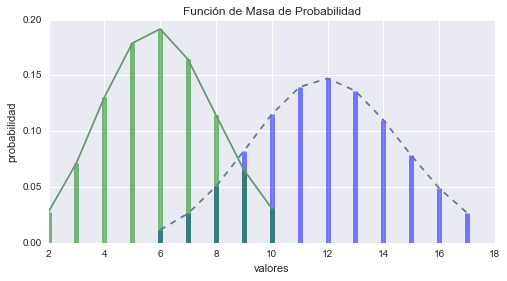
* Funcion de distribucion acumulada FDA: Se puede usar en discreta y continua. Probabilidad que una variable se situe en una zona de valores menores o iguales a x

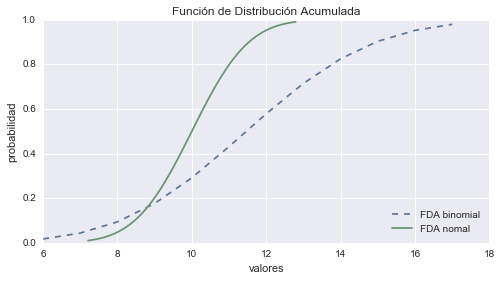
* Funcion Densidad de Probabilidad FDP: Solo para continuas, deriva de la FDA
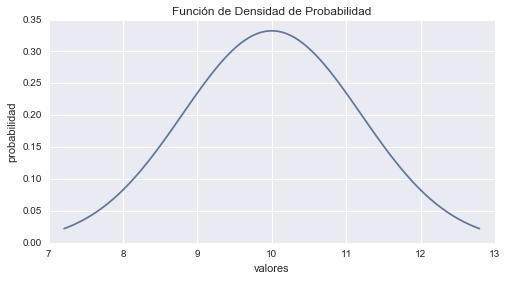


### Variables aleatorias discretas
* El valor no es conocido
* Cada valor que puede asumir tiene una probabilidad de ocurrencia
* Tiene una distribucion de probabilidad asociada

* Tiene valor esperado
* Media
* Varianza y Covar

In [ ]:
#####
import pandas as pd
import numpy as np
import scipy 
from scipy.stats import stats
import matplotlib.pyplot as plt


#### Distribuciones
]

#### 1. **Bernoulli**: bool
  * Caso especial de la binomial donde solo se realiza un experimento
  * n = 1, los resultados tienen que ser 0 y 1


(array([5005.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4995.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

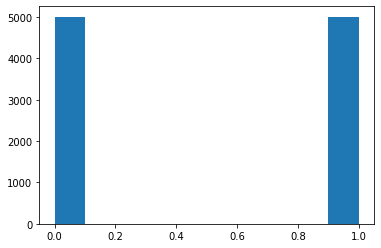

In [ ]:
# Crea una lista de  juegos aleatorios
bernoulli_ejemplo = np.random.binomial(1, 0.5, size = 10000)
plt.hist(bernoulli_ejemplo)

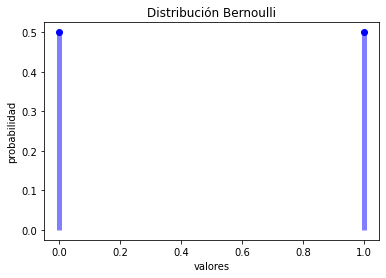

In [ ]:
# Graficando Bernoulli con scipy
p =  0.5 # planzar una moneda
bernoulli = scipy.stats.bernoulli(p)
x = np.arange(0, 2)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad

fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
#ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

#### 2. **Binomial**
  * Si el experimento de bernoulli se repite varias veces se cimbierte en binomial


(array([   6.,    0.,   81.,    0.,  452.,    0., 1176.,    0., 2040.,
           0., 2449.,    0., 2119.,    0., 1179.,    0.,  395.,    0.,
          96.,    7.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

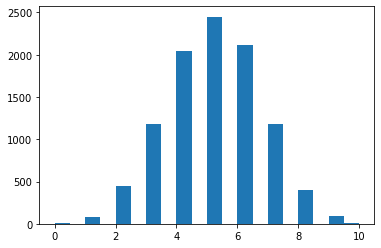

In [ ]:
  # Lanzamos una moneda 10 veces, esto lo repetimos 10000 veces
  # La probabilidad de éxito es 0.5
binomial = np.random.binomial(10, 0.5, size=10000) # genera una binomial
  
  # Histograma
plt.hist(binomial , 20)
  

* Un proveedor de DVDs regrabables afirma que solamente el 4 % de los
artículos suministrados son defectuosos. Si un cliente compra un lote de 25 DVDs, ¿cuál es el número esperado de DVDs defectuosos en el lote? Si el cliente encuentra que 4 de los DVDs comprados son defectuosos, ¿debe dudar de la afirmación del vendedor?


Probabilidad promedio de defectuosos:  1.0


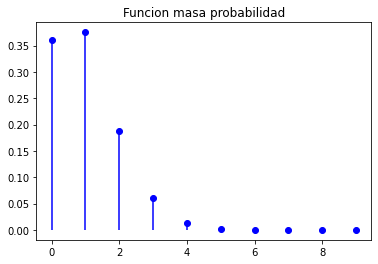

In [ ]:
# Nro de dvds medio defectuosos
X = scipy.stats.binom(25, 0.04)

print('Probabilidad promedio de defectuosos: ', X.mean()) # 1.0

#X.sf(3)

x = np.arange(10)
fmp =  X.pmf(x)

plt.plot(x, fmp, 'bo') # punto 
plt.vlines(x, 0, fmp,"b") # Lineas
plt.title('Funcion masa probabilidad')
plt.show()


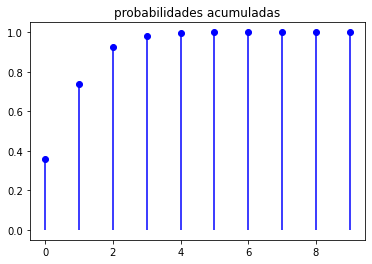

In [ ]:
cdf =  X.cdf(x)

plt.plot(x, cdf, 'bo') # punto 
plt.vlines(x, 0, cdf,"b") # Lineas
plt.title('probabilidades acumuladas')
plt.show()



https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

https://blog.adrianistan.eu/estadistica-python-distribucion-binomial-normal-poisson-parte-vi

https://platzi.com/blog/variables-aleatorias-y-distribuciones-de-probabilidad-que-debes-conocer/

#### 3. **Poisson**
 * Probabilidad que un numero de eventos ocurra en un lapso de tiempo
 * Se conoce el tiempo promedio entre los eventos
 * Los eventos son idependientes entre si
 

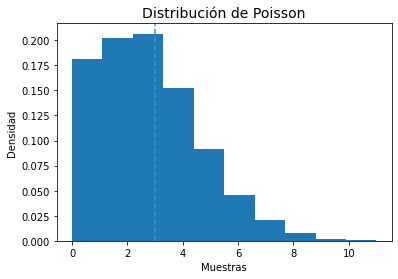

In [ ]:
# Partido de futbol de 90 minutos donde el promedio de goles es 3

poissin_ejemplo = np.random.poisson(3, 10000) # muestra con simulacion de 10000 muestras

fig, ax = plt.subplots()
plt.hist(poissin_ejemplo, density=True, bins=10)
plt.title('Distribución de Poisson', size=14)
plt.xlabel('Muestras')
plt.ylabel('Densidad')
plt.axvline(3, color='#3793ef', linestyle='--')
plt.show()

Probabilidad promedio goles:  0.00029233695064733665


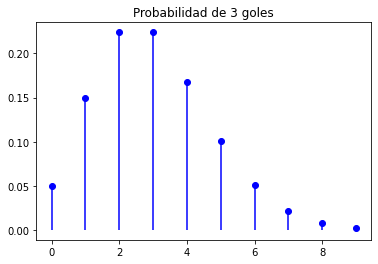

In [ ]:
# Partido de futbol de 90 minutos donde el promedio de goles es 3
X = scipy.stats.poisson(3)

print('Probabilidad promedio goles: ', X.sf(10))

x = np.arange(10)
fmp =  X.pmf(x)

plt.plot(x, fmp, 'bo') # punto 
plt.vlines(x, 0, fmp,"b") # Lineas
plt.title('Probabilidad de 3 goles')
plt.show()

#### 4. **Hipergeometrica**
Escribe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez).
N: 12 bolas rojas

M: 30 bolas azules

n: Escojo 10 al azar sin reemplazo


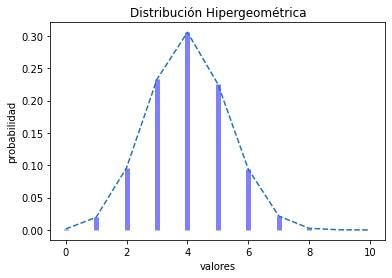

In [ ]:

# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = scipy.stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

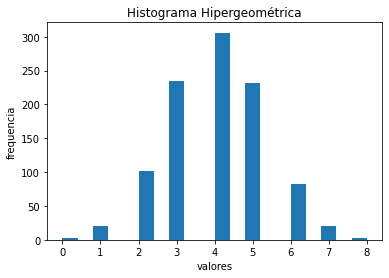

In [ ]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

#### 5. **Geometrica**
Esperar n pruebas hasta encontrar el primer exito si la probabilidad de exito de una sola prueba es p

el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

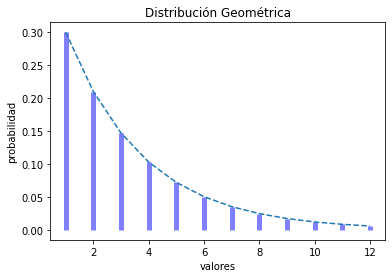

In [ ]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = scipy.stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

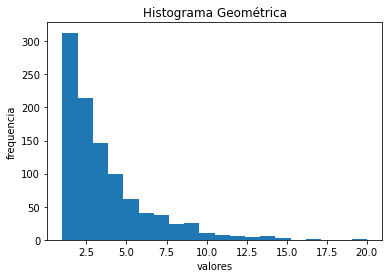

In [ ]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

## Variables aleatorias continuas


#### 1. **Normal**

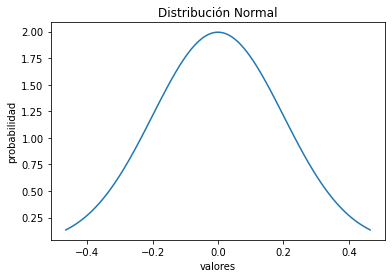

In [ ]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = scipy.stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

#### 2. **Distribucion Uniforme**


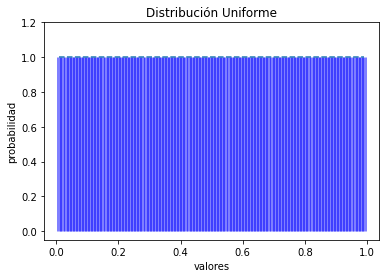

In [ ]:

# Graficando Uniforme
uniforme = scipy.stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

#### 3. **Log - Normal**

El peso de los adultos.
La concentración de los minerales en depósitos.
Duración de licencia por enfermedad.
Distribución de riqueza
Tiempos muertos de maquinarias

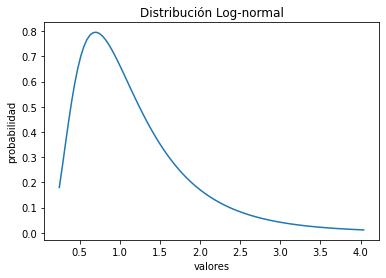

In [ ]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = scipy.stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

4 . **Exponencial**
 * Dos sucesos consecutivos que utilizan la distribucion de poisson 
 * El proceso de accesos a una página web se produce de una forma estable e independiente, siendo el intervalo entre dos accesos consecutivos una v.a. exponencial. Sabiendo que, de media, se produce un acceso cada minuto,¿cuál es la probabilidad de que no se produzcan accesos en 4 minutos? y ¿cuál esla probabilidad de que el tiempo transcurrido entre dos accesos consecutivos sea inferior a 90 segundos?


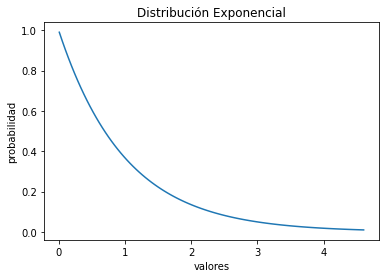

In [ ]:
# Graficando Exponencial
exponencial = scipy.stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

#### 5. Beta


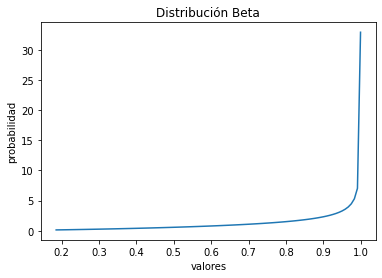

In [ ]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = scipy.stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

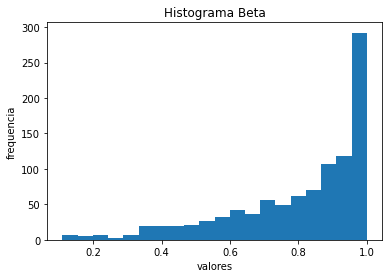

In [ ]:
# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

#### 6. **Chi cuadrado**
Esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados

In [ ]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()